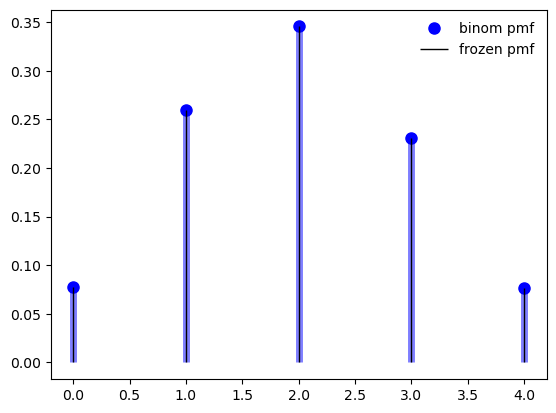

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)

plt.show()

In [3]:
binom.cdf(x, n, p)

array([0.07776, 0.33696, 0.68256, 0.91296, 0.98976])

In [34]:
from scipy.stats import binom

def binomial(n,p,x=None,pvalue=None,print_out=True):
    rv = binom(n,p)
    res=dict()
    
    def acc_p(h,t,s,threshold):
        p=0
        for i in range(h,t,s):
            p+=rv.pmf(i)
            if p> threshold:
                return p-rv.pmf(i), i-s
            
    if not x is None:
        res["px"]=rv.pmf(x)
        res["left_acc_p"]=sum([rv.pmf(i) for i in range(x+1)])
        res["right_acc_p"]=sum([rv.pmf(i) for i in range(x,n+1)])
        if res["left_acc_p"]<res["right_acc_p"]:
            right_acc_p,right_x=acc_p(n,x,-1,res["left_acc_p"])
            left_acc_p,left_x=res["left_acc_p"],x
        else:
            left_acc_p,left_x=acc_p(0,x,1,res["right_acc_p"])
            right_acc_p,right_x=res["right_acc_p"],x
        res["equal_tail"]={
            "x_left":left_x,"x_right":right_x,
            "acc_p_left":left_acc_p, "acc_p_right":right_acc_p
        }
        
        if print_out:
            print("Prob at x = %d is %.3f."%(x,res["px"]))
            print("Prob 0 to x including x total is %.3f."%res["left_acc_p"])
            print("Prob x to n including x total is %.3f."%res["right_acc_p"])
            print("Equal tail at two sides \nLeft at %d, acc. prob is %.3f."%(
                    left_x,left_acc_p))
            print("Right at %d, acc. prob is %.3f."%(right_x,right_acc_p))
            
    elif not pvalue is None:
        res["left_acc_p"],res["x_left"]=acc_p(0,n+1,1,pvalue)
        res["right_acc_p"],res["x_right"]=acc_p(n,-1,-1,pvalue)
        left_acc_p,left_x=acc_p(0,n+1,1,pvalue/2)
        right_acc_p,right_x=acc_p(n,-1,-1,pvalue/2)
        res["equal_tail"]={
            "x_left":left_x,"x_right":right_x,
            "acc_p_left":left_acc_p, "acc_p_right":right_acc_p
        }
        
        if print_out:
            print("P value = %.3f"%pvalue)
            print("Prob 0 to x = %d including x total is %.3f."%
                  (res["x_left"],res["left_acc_p"]))
            print("Prob x = %d to n including x total is %.3f."%
                  (res["x_right"],res["right_acc_p"]))
            print("Equal tail at two sides \nLeft at %d, acc. prob is %.3f."%(
                    left_x,left_acc_p))
            print("Right at %d, acc. prob is %.3f."%(right_x,right_acc_p))
        
    res["pmf"]=[rv.pmf(i) for i in range(n+1)]
    return res
        
                    
    

In [35]:
binomial(n=250,p=0.073,x=9)

Prob at x = 9 is 0.006.
Prob 0 to x including x total is 0.011.
Prob x to n including x total is 0.995.
Equal tail at two sides 
Left at 9, acc. prob is 0.011.
Right at 29, acc. prob is 0.009.


{'px': 0.006231021994835535,
 'left_acc_p': 0.01103610978073807,
 'right_acc_p': 0.9951949122140974,
 'equal_tail': {'x_left': 9,
  'x_right': 29,
  'acc_p_left': 0.01103610978073807,
  'acc_p_right': 0.009428272153884618},
 'pmf': [5.8875354636597044e-09,
  1.1590886969988062e-07,
  1.1363945655527152e-06,
  7.397801947057318e-06,
  3.597350779595205e-05,
  0.00013937696936347588,
  0.00044817639285612426,
  0.0012302231329254499,
  0.002942681790043759,
  0.006231021994835535,
  0.01182549837703805,
  0.020318008391262743,
  0.03186698061869485,
  0.04594281978833315,
  0.061246472889347515,
  0.07588308054208397,
  0.08776795082925092,
  0.09513624824324292,
  0.0969778524732902,
  0.09325026454821099,
  0.08481549142807422,
  0.07315210875211152,
  0.059962920565315665,
  0.046809382762961954,
  0.03486507918756923,
  0.024820024873204657,
  0.016914318668259373,
  0.011050498975723284,
  0.006930616151402276,
  0.004178014557513118,
  0.0024237291929650987,
  0.0013545286856324443

In [36]:
binomial(n=250,p=0.073,pvalue=0.05)

P value = 0.050
Prob 0 to x = 11 including x total is 0.043.
Prob x = 26 to n including x total is 0.044.
Equal tail at two sides 
Left at 10, acc. prob is 0.023.
Right at 28, acc. prob is 0.016.


{'left_acc_p': 0.04317961654903886,
 'x_left': 11,
 'right_acc_p': 0.04432370594926956,
 'x_right': 26,
 'equal_tail': {'x_left': 10,
  'x_right': 28,
  'acc_p_left': 0.022861608157776117,
  'acc_p_right': 0.016358888305286895},
 'pmf': [5.8875354636597044e-09,
  1.1590886969988062e-07,
  1.1363945655527152e-06,
  7.397801947057318e-06,
  3.597350779595205e-05,
  0.00013937696936347588,
  0.00044817639285612426,
  0.0012302231329254499,
  0.002942681790043759,
  0.006231021994835535,
  0.01182549837703805,
  0.020318008391262743,
  0.03186698061869485,
  0.04594281978833315,
  0.061246472889347515,
  0.07588308054208397,
  0.08776795082925092,
  0.09513624824324292,
  0.0969778524732902,
  0.09325026454821099,
  0.08481549142807422,
  0.07315210875211152,
  0.059962920565315665,
  0.046809382762961954,
  0.03486507918756923,
  0.024820024873204657,
  0.016914318668259373,
  0.011050498975723284,
  0.006930616151402276,
  0.004178014557513118,
  0.0024237291929650987,
  0.00135452868563

In [37]:
binomial(n=250,p=0.036,pvalue=0.05)

P value = 0.050
Prob 0 to x = 3 including x total is 0.020.
Prob x = 15 to n including x total is 0.039.
Equal tail at two sides 
Left at 3, acc. prob is 0.020.
Right at 16, acc. prob is 0.020.


{'left_acc_p': 0.019625950927256365,
 'x_left': 3,
 'right_acc_p': 0.03853655859579942,
 'x_right': 15,
 'equal_tail': {'x_left': 3,
  'x_right': 16,
  'acc_p_left': 0.019625950927256365,
  'acc_p_right': 0.01994974232209934},
 'pmf': [0.00010453421823874644,
  0.0009759418715235502,
  0.004537522269884341,
  0.014007952567609725,
  0.032302571118046096,
  0.05935094809572947,
  0.09050403910863324,
  0.11781082980590311,
  0.13363707717090767,
  0.13419158786456284,
  0.12077242907810719,
  0.09840378981844947,
  0.0731903706429756,
  0.0500395065168379,
  0.031634341256791765,
  0.018586816273700082,
  0.010194791602405495,
  0.005240476230086906,
  0.0025332592564527956,
  0.0011551529433224358,
  0.000498249578665424,
  0.00020378909856499355,
  7.921715053610897e-05,
  2.9325923308694943e-05,
  1.0358378513081557e-05,
  3.4969198166984077e-06,
  1.1301089417194714e-06,
  3.501305711551378e-07,
  1.0413634503680385e-07,
  2.9770270050584538e-08,
  8.189912466198139e-09,
  2.1705296

In [38]:
3/250,16/250

(0.012, 0.064)